In [27]:
import pandas as pd
import matplotlib.pyplot as plt
# Read in the CSV file as a Pandas dataframe
episodes = pd.read_csv("episode.csv")

# Print the first 5 rows of the dataframe
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Step                        5480 non-null   int64
 1   typical_run - episode       5480 non-null   int64
 2   typical_run - episode__MIN  5480 non-null   int64
 3   typical_run - episode__MAX  5480 non-null   int64
dtypes: int64(4)
memory usage: 171.4 KB


In [28]:

episodes = episodes.drop(episodes.columns[2], axis=1)
episodes = episodes.drop(episodes.columns[2], axis=1)

In [29]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Step                   5480 non-null   int64
 1   typical_run - episode  5480 non-null   int64
dtypes: int64(2)
memory usage: 85.8 KB


## reward

In [30]:
reward = pd.read_csv("reward.csv")

reward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Step                            1370 non-null   int64  
 1   typical_run - mean_reward       1370 non-null   float64
 2   typical_run - mean_reward__MIN  1370 non-null   float64
 3   typical_run - mean_reward__MAX  1370 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 42.9 KB


In [31]:
reward = reward.drop(reward.columns[2], axis=1)
reward = reward.drop(reward.columns[2], axis=1)

In [32]:
reward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Step                       1370 non-null   int64  
 1   typical_run - mean_reward  1370 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 21.5 KB


In [33]:
reward

,Step,typical_run - mean_reward
0,540,0.070000
1,1144,0.058333
2,1748,0.041111
3,2352,0.037500
4,2956,0.032000
...,...,...
1365,700606,1.945889
1366,701210,1.944361
1367,701814,1.942835
1368,702418,1.941277


In [34]:
# Perform an inner join on column 'A'
result = pd.merge(reward, episodes, on='Step', how='inner')

In [35]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1369
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Step                       1370 non-null   int64  
 1   typical_run - mean_reward  1370 non-null   float64
 2   typical_run - episode      1370 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 42.8 KB


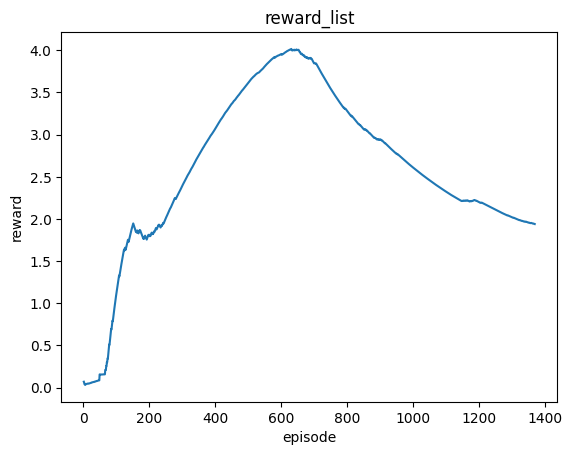

In [43]:
# plot the data
reward_list = result['typical_run - mean_reward'].values.tolist()
episode_list = result['typical_run - episode'].values.tolist()


plt.plot(episode_list,reward_list)
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('reward_list')
plt.show()


In [69]:
actions = pd.read_csv("actions.csv")
actions = actions.drop(actions.columns[2], axis=1)
actions = actions.drop(actions.columns[2], axis=1)
actions['Step'] = actions['Step'] + 2
actions

,Step,typical_run - number_of_actions_in_episode
0,540,299
1,1144,299
2,1748,299
3,2352,299
4,2956,299
...,...,...
1365,700606,294
1366,701210,299
1367,701814,299
1368,702418,299


In [70]:
# Perform an inner join on column 'A'
result_new = pd.merge(result, actions, on='Step', how='inner')

In [71]:
result_new = result_new.rename(columns={'typical_run - mean_reward': 'reward_mean_all'})
result_new = result_new.rename(columns={'typical_run - episode': 'episode'})
result_new = result_new.rename(columns={'typical_run - number_of_actions_in_episode': 'actions'})
result_new["actions"] = result_new["actions"] + 1

In [73]:
result_new

# create a new column 'B' that has the rolling sum of column 'A'
result_new['total_actions'] = result_new['actions'].rolling(window=len(result_new), min_periods=1).sum()
result_new['sum of rewards'] = result_new['total_actions'] * result_new['reward_mean_all']
result_new

,Step,reward_mean_all,episode,actions,total_actions,sum of rewards
0,540,0.070000,1,300,300.0,21.000000
1,1144,0.058333,2,300,600.0,35.000000
2,1748,0.041111,3,300,900.0,37.000000
3,2352,0.037500,4,300,1200.0,45.000002
4,2956,0.032000,5,300,1500.0,47.999997
...,...,...,...,...,...,...
1365,700606,1.945889,1366,295,347603.0,676397.018470
1366,701210,1.944361,1367,300,347903.0,676448.973577
1367,701814,1.942835,1368,300,348203.0,676501.007729
1368,702418,1.941277,1369,300,348503.0,676540.992420


In [80]:
# create a new column 'B' that has the difference between adjacent rows in column 'A'
result_new['diff_reward'] = result_new['sum of rewards'].diff(1)
result_new['diff_reward'] = result_new['diff_reward'].fillna(result_new['sum of rewards'])
result_new

,Step,reward_mean_all,episode,actions,total_actions,sum of rewards,diff_reward
0,540,0.070000,1,300,300.0,21.000000,21.000000
1,1144,0.058333,2,300,600.0,35.000000,14.000000
2,1748,0.041111,3,300,900.0,37.000000,2.000000
3,2352,0.037500,4,300,1200.0,45.000002,8.000001
4,2956,0.032000,5,300,1500.0,47.999997,2.999995
...,...,...,...,...,...,...,...
1365,700606,1.945889,1366,295,347603.0,676397.018470,1061.011717
1366,701210,1.944361,1367,300,347903.0,676448.973577,51.955108
1367,701814,1.942835,1368,300,348203.0,676501.007729,52.034152
1368,702418,1.941277,1369,300,348503.0,676540.992420,39.984691


In [81]:
result_new["mean reward over episode"] = result_new["diff_reward"] / result_new["actions"]
result_new

,Step,reward_mean_all,episode,actions,total_actions,sum of rewards,diff_reward,mean reward over episode
0,540,0.070000,1,300,300.0,21.000000,21.000000,0.070000
1,1144,0.058333,2,300,600.0,35.000000,14.000000,0.046667
2,1748,0.041111,3,300,900.0,37.000000,2.000000,0.006667
3,2352,0.037500,4,300,1200.0,45.000002,8.000001,0.026667
4,2956,0.032000,5,300,1500.0,47.999997,2.999995,0.010000
...,...,...,...,...,...,...,...,...
1365,700606,1.945889,1366,295,347603.0,676397.018470,1061.011717,3.596650
1366,701210,1.944361,1367,300,347903.0,676448.973577,51.955108,0.173184
1367,701814,1.942835,1368,300,348203.0,676501.007729,52.034152,0.173447
1368,702418,1.941277,1369,300,348503.0,676540.992420,39.984691,0.133282


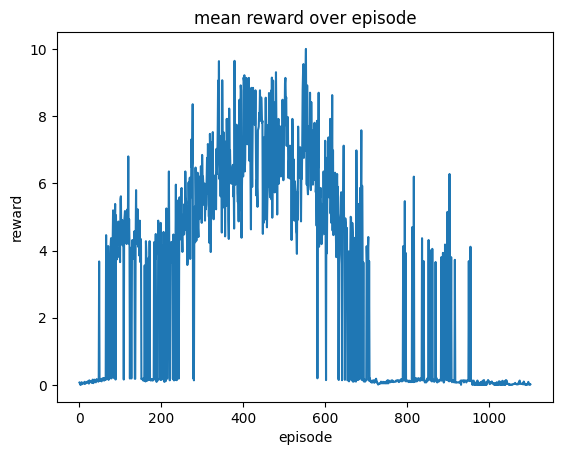

In [89]:
# plot the data
reward_list = result_new['mean reward over episode'].values.tolist()
episode_list = result_new['episode'].values.tolist()


episode_list = episode_list[0:1100]
reward_list = reward_list[0:1100]

plt.plot(episode_list,reward_list)
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('mean reward over episode')
plt.show()